In [1]:
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def multi_plot(xs, ys, nGraphShown, nGraphPerRow, labels=None):
    
    cmap = plt.get_cmap('hsv')

    nCol = len(ys)
    nGraphRow = (nCol+nGraphPerRow-1)/nGraphPerRow
    nGraphRow = int(nGraphRow)

    def legend_without_duplicate_labels(ax, **kwargs):
        handles, labels = ax.get_legend_handles_labels()
        unique = [ (h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i] ]
        ax.legend(*zip(*unique), **kwargs)

    fig = plt.figure(figsize=(8*nGraphPerRow, 4*nGraphRow), dpi=40)
    fig.subplots_adjust(wspace=0.6, hspace=0.4)
    axes = { i: fig.add_subplot(nGraphRow, nGraphPerRow, i+1) for i in range(nGraphShown) }
    
    for i, (key, ax) in enumerate(axes.items()):
        x, y = xs[i], ys[i]
        ax.plot(x, y, color=cmap(i/nCol), label='plot label')
        ax.set_xlim([min(x), max(x)])
        ax.set_ylim([min(y), max(y)])
        ax.set_xlabel('xlabel', fontsize=16)
        ax.set_ylabel('ylabel', fontsize=16)
        ax.set_title('title', fontsize=16)
    
        try:
            label = labels[i]
            ax.set_xticks(label)
            ax.set_xticklabels(label, rotation=90)
        except:
            pass
        
        legend_without_duplicate_labels(ax, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
        ax.grid(axis='both', linestyle='--', color='k')

    plt.show()

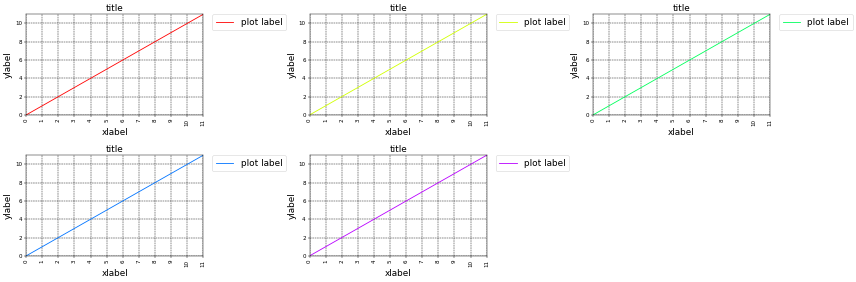

In [4]:
xs = [ [ i for i in range(12)] for j in range(5) ]
multi_plot(xs, xs, 5, 3, xs)